<a href="https://colab.research.google.com/github/neto-riga/Metodos_Numericos/blob/main/Ejercicio_5_Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)

# Método de la secante 
#### Martínez Venegas Raúl
#### Rivera Gálvez Ernesto
---

Para determinar $M$,  se emplea la ecuación: 

$$f(M)=\frac{\left\lbrace \left[ \frac{2 + 0.4M^2}{2.4}\right]^{3.5} -1  \right\rbrace}{0.7M^2C_{pi}}-\left\lbrace \sqrt{1 - M^2} + \frac{\left(\frac{M^2C_{pi}}{2}\right)}{1 + \sqrt{1 - M^2}} \right\rbrace^{-1} $$


Se supondrá $C_{pi}=-0.383$ y que se está buscando el valor de $M$, que se espera que esté en algún punto entre $0.5$ y $0.9$.
El comportamiento de la función $f(M)$ es importante, para $C_{pi}=-0.383$, la funcuón decrece desde $+\infty$ hasta $-\infty$ cuando $M$ crece desde $0$ hasta $0.987$; entonces es necesario imponer algunas restricciones sobre los valores de acotamiento iniciales, para lo que es importante graficar.



*   Obtener el número de Match crítico el método de la secante 
*   Detener las iteraciones cuando se alcance un error relativo porcentual de 0.0003% 
* Explica la elección del valor inicial.



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
from IPython.html.widgets import  interact

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Declaramos nuestra función:

In [ ]:
def f(m): return (np.power(((2 + 0.4*m**2) / 2.4), 3.5) - 1)\
                          / (0.7 * m**2 * -0.383)\
                  - 1 / ( np.sqrt(1-m**2)
                        + ((m**2 * -0.383) / 2)\
                          / (1 + np.sqrt(1-m**2)) )

Realizamos una gráfica de nuestra función en el rango de interés (0.5, 0.9) para darnos una idea de qué valores iniciales tomar.

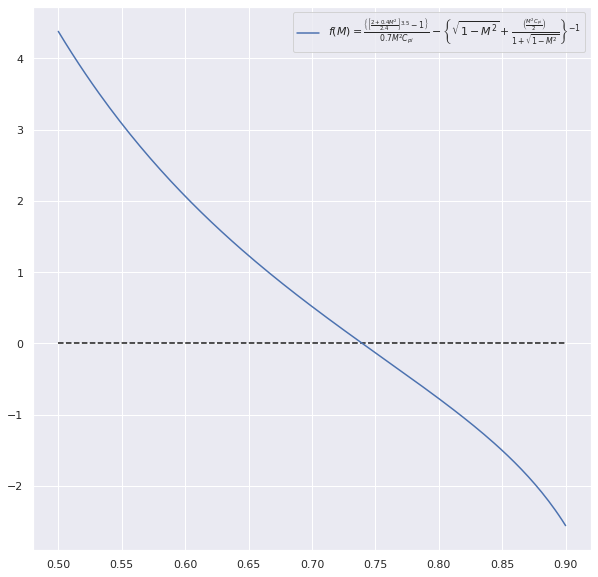

In [ ]:
X = np.linspace(0.5, 0.9, num=150)
fig=plt.figure(figsize=(10,10))
sns.lineplot(x=X, y=[f(x) for x in X])
plt.legend([r'$f(M)=\frac{\left\{\left[\frac{2 + 0.4M^2}{2.4}\right]^{3.5}-1\right\}}\
          {0.7M^2C_{pi}}-\left\{\sqrt{1-M^2}+\
          \frac{\left(\frac{M^2C_{pi}}{2}\right)}{1+\sqrt{1-M^2}}\right\}^{-1}}$'])
plt.rc('legend', fontsize=15)
plt.hlines(y=0, xmin=X[0], xmax=X[-1], linestyles='--');

Como vemos en la grafica, podemos elegir los valores $x_0 = 0.5$ y $x_1 = 0.7$ de modo que al aplicar el método de la secante, nos acercaremos a la raíz que se encuentra en el intervalo de interés.

In [ ]:
x0 = [0.6]
x1 = [0.7]
x2 = [ x1[0] - (f(x1[0])) * (x0[0] - x1[0]) / (f(x0[0]) - f(x1[0])) ]
error_a = [np.nan]
error_r = [np.nan]
error_rp = [1]
i = 0

while error_rp[i]>0.0003:
  x0.append(x1[i])
  x1.append(x2[i])
  i += 1
  x2.append( x1[i] - (f(x1[i])) * (x0[i] - x1[i]) / (f(x0[i]) - f(x1[i])) )
  error_a.append(abs(x2[i]-x2[i-1]))
  error_r.append(error_a[i]/abs(x2[i]))
  error_rp.append(error_r[i]*100)
error_rp[0] = np.nan

tabla = pd.DataFrame(data = {
                      'Iteración': np.arange(1, len(x2) + 1),
                      'xk-1': x0,
                      'xk': x1,
                      'f(xk-1)': [f(x) for x in x0],
                      'f(xk)': [f(x) for x in x1],
                      'xk+1': x2,
                      'f(xk+1)': [f(x) for x in x2],
                      'Error absoluto': error_a,
                      'Error relativo': error_r,
                      'Error relativo [%]': error_rp,
                      })
tabla.set_index('Iteración', inplace=True)
tabla

,xk-1,xk,f(xk-1),f(xk),xk+1,f(xk+1),Error absoluto,Error relativo,Error relativo [%]
Iteración,,,,,,,,,
1,0.600000,0.700000,2.066634,0.517587,0.733413,7.922404e-02,NaN,NaN,NaN
2,0.700000,0.733413,0.517587,0.079224,0.739452,1.869937e-03,6.038678e-03,8.166424e-03,0.816642
3,0.733413,0.739452,0.079224,0.001870,0.739598,4.419575e-06,1.459774e-04,1.973740e-04,0.019737
4,0.739452,0.739598,0.001870,0.000004,0.739598,2.231939e-10,3.458332e-07,4.675960e-07,0.000047


Como vemos en la tabla, después de cuatro iteraciones, la tolerancia es alcanzada, finalizando con un error relativo porcentual del $1\mathrm{e}{-4}\%$ donde nuestra **aproximación final** resultó en: **0.839598**.

A continuación tenemos una gráfica interactiva en la cuál podemos observar el comportamiento de $x_{k-1}$, $x_{k}$ y $x_{k+1}$ a lo largo de nuestras cuatro iteraciones, para observar dicho comportamiento, utilice el deslizador para acceder a la iteración deseada. 

In [ ]:
def R(x, x1,y1,m):
  return (m*(x-x1))+y1

In [ ]:
def pinta_funcion(Iteración): 
  X = np.linspace(0.5, 0.9, num=150)
  fig=plt.figure(figsize=(10,10))
  plt.plot(X, [f(x) for x in X])
  plt.rc('legend', fontsize=12)
  plt.hlines(y=0, xmin=X[0], xmax=X[-1], linestyles='--');
  m=(f(x1[Iteración])-f(x0[Iteración]))/(x1[Iteración]-x0[Iteración])
  plt.plot(X, [R(x,x0[Iteración],f(x0[Iteración]),m) for x in X], color="black")
  plt.plot(x0[Iteración],f(x0[Iteración]), marker="o", color="red")
  plt.plot(x1[Iteración],f(x1[Iteración]), marker="o", color="green")
  plt.plot(x2[Iteración],0, marker="o", color="yellow")
  plt.legend([r'$f(M)=\frac{\left\{\left[\frac{2 + 0.4M^2}{2.4}\right]^{3.5}-1\right\}}\
            {0.7M^2C_{pi}}-\left\{\sqrt{1-M^2}+\
            \frac{\left(\frac{M^2C_{pi}}{2}\right)}{1+\sqrt{1-M^2}}\right\}^{-1}}$', r'$sec$', r'$x_{k-1}$',r'$x_{k}$', r'$x_{k+1}$'])

## Para que la gráfica con deslizador funcione, favor de ejecutar todas las celdas. Puede presionar Ctrl+F9 o en la opción Runtime, elegir la primera opción de ejecutar todo.

In [ ]:
interact(pinta_funcion, Iteración=(0,3));

interactive(children=(IntSlider(value=1, description='Iteración', max=3), Output()), _dom_classes=('widget-int…

Con el delizador anterior podemos ver la importancia y la naturaleza del método, resaltando como los puntos que intersecan la función se acercan con cada iteración hasta encontrar la raíz.

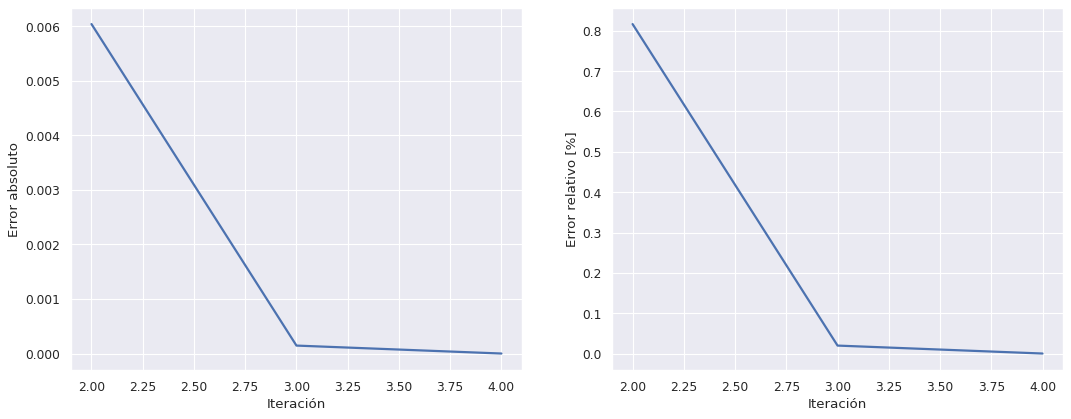

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6), dpi=80)
sns.lineplot(x='Iteración', y='Error absoluto',
             data=tabla, ax=axs[0], linewidth=2)
sns.lineplot(x='Iteración', y='Error relativo [%]',
             data=tabla, ax=axs[1], linewidth=2);

Podemos decir con seguridad que nuestro método converge, con las gráficas queda evidente que con cada iteración el error disminuye hasta alcanzar la tolerancia deseada.

## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)